# Analisis de ventas DSMarket

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar el DataFrame desde el archivo preprocesado
df = pd.read_csv('/content/drive/MyDrive/Proyecto DSMarket/DSMarket/DatosAgrupadosEnSemanas.csv.gz')

In [4]:
df['date'] = pd.to_datetime(df['año'].astype(str) + df['semana'].astype(str).str.zfill(2) + '1', format='%G%V%u')

In [5]:
df_phi = df[df['region']=='Philadelphia']
df_bos = df[df['region']=='Boston']
df_ny = df[df['region']=='New York']

## Gráfico de Ventas

In [6]:
df_sell = df[df['ventas'] > 0]

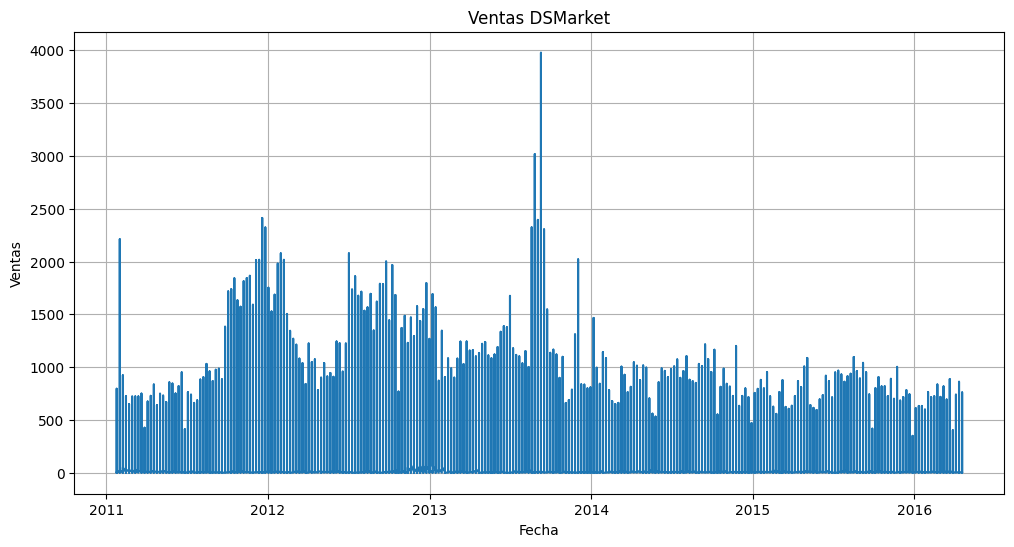

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_sell['date'], df_sell['ventas'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas DSMarket')
plt.grid(True)
plt.show()


##Ventas

In [8]:
ventas_tot=df['ventas'].sum()
print(f'Ventas Totales: {ventas_tot:,.2f}')

Ventas Totales: 65,695,409.00


###CIUDAD

In [9]:
def ventas_totales_por_region(df):
  """Calcula las ventas totales por región, mostrando resultados legibles."""

  ventas_region = df.groupby('region')['ventas'].sum().reset_index()

  for _, row in ventas_region.iterrows():
    region = row['region']
    ventas = row['ventas']
    print(f"Región: {region}, Ventas totales: {ventas:,.2f}")


# Calcular y mostrar las ventas totales por región para todo el DataFrame
print("Ventas totales por región:")
ventas_totales_por_region(df)


Ventas totales por región:
Región: Boston, Ventas totales: 18,899,006.00
Región: New York, Ventas totales: 28,675,547.00
Región: Philadelphia, Ventas totales: 18,120,856.00


###TIENDA

####Philadelphia

In [10]:
for i in [df_phi[df_phi['store']=='Midtown_Village'],df_phi[df_phi['store']=='Yorktown'],df_phi[df_phi['store']=='Queen_Village']]:
  print(i['store'].unique(),)
  ventas_totales_por_region(i)
  print('--'*20)

['Midtown_Village']
Región: Philadelphia, Ventas totales: 5,149,062.00
----------------------------------------
['Yorktown']
Región: Philadelphia, Ventas totales: 6,544,012.00
----------------------------------------
['Queen_Village']
Región: Philadelphia, Ventas totales: 6,427,782.00
----------------------------------------


####New York

In [11]:
for i in [df_ny[df_ny['store']=='Greenwich_Village'],
          df_ny[df_ny['store']=='Harlem'],
          df_ny[df_ny['store']=='Tribeca'],
          df_ny[df_ny['store']=='Brooklyn']]:
  print(i['store'].unique(),)
  ventas_totales_por_region(i)
  print('--'*20)

['Greenwich_Village']
Región: New York, Ventas totales: 7,698,216.00
----------------------------------------
['Harlem']
Región: New York, Ventas totales: 5,685,475.00
----------------------------------------
['Tribeca']
Región: New York, Ventas totales: 11,188,180.00
----------------------------------------
['Brooklyn']
Región: New York, Ventas totales: 4,103,676.00
----------------------------------------


####Boston

In [12]:
for i in [df_bos[df_bos['store']=='South_End'],
          df_bos[df_bos['store']=='Roxbury'],
          df_bos[df_bos['store']=='Back_Bay']]:
  print(i['store'].unique(),)
  ventas_totales_por_region(i)
  print('--'*20)

['South_End']
Región: Boston, Ventas totales: 5,595,292.00
----------------------------------------
['Roxbury']
Región: Boston, Ventas totales: 7,214,384.00
----------------------------------------
['Back_Bay']
Región: Boston, Ventas totales: 6,089,330.00
----------------------------------------


##Crecimiento medio de ventas ANUAL

No se han tenido en cuenta los registros de 2016 ya que no está el año entero y este puede afectar a los porcentajes de crecimineto

In [13]:
 df_2016 = df[df['año'] < 2016]

In [14]:
def crecimiento(df):
   df_2016 = df[df['año'] < 2016]
   # Agrupar las ventas totales por año
   ventas_por_año = df_2016.groupby('año')['ventas'].sum().reset_index()

   # Calcular el crecimiento de ventas año a año
   ventas_por_año['ventas_anterior'] = ventas_por_año['ventas'].shift(1)

   # Calcular el porcentaje de crecimiento
   ventas_por_año['crecimiento_porcentaje'] = ((ventas_por_año['ventas'] - ventas_por_año['ventas_anterior']) / ventas_por_año['ventas_anterior']) * 100

   # Ver los resultados
   print(ventas_por_año[['año', 'ventas', 'crecimiento_porcentaje']])

   # Calcular el crecimiento medio (ignorando valores NaN)
   crecimiento_medio = ventas_por_año['crecimiento_porcentaje'].mean()

   # Mostrar el crecimiento medio
   print(f"Crecimiento medio de ventas anual: {crecimiento_medio:.2f}%")

In [15]:
crecimiento(df_2016)

    año    ventas  crecimiento_porcentaje
0  2011   8878392                     NaN
1  2012  12004994               35.215859
2  2013  13103685                9.151950
3  2014  13064023               -0.302678
4  2015  14015396                7.282389
Crecimiento medio de ventas anual: 12.84%


###CIUDAD

In [16]:
for i in [df_phi,df_bos,df_ny]:
  print(i['region'].unique())
  crecimiento(i)

['Philadelphia']
    año   ventas  crecimiento_porcentaje
0  2011  2205989                     NaN
1  2012  3166709               43.550534
2  2013  3616430               14.201526
3  2014  3659428                1.188963
4  2015  4040567               10.415262
Crecimiento medio de ventas anual: 17.34%
['Boston']
    año   ventas  crecimiento_porcentaje
0  2011  2718383                     NaN
1  2012  3593731               32.201055
2  2013  3769871                4.901313
3  2014  3664626               -2.791740
4  2015  3916610                6.876118
Crecimiento medio de ventas anual: 10.30%
['New York']
    año   ventas  crecimiento_porcentaje
0  2011  3954020                     NaN
1  2012  5244554               32.638530
2  2013  5717384                9.015638
3  2014  5739969                0.395023
4  2015  6058219                5.544455
Crecimiento medio de ventas anual: 11.90%


###TIENDA

####Philadelphia

In [17]:
df_phi['store'].unique()

array(['Midtown_Village', 'Yorktown', 'Queen_Village'], dtype=object)

In [18]:
for i in [df_phi[df_phi['store']=='Midtown_Village'],df_phi[df_phi['store']=='Yorktown'],df_phi[df_phi['store']=='Queen_Village']]:
  print(i['store'].unique(),)
  crecimiento(i)
  print('--'*20)

['Midtown_Village']
    año   ventas  crecimiento_porcentaje
0  2011   541135                     NaN
1  2012   721195               33.274506
2  2013  1018608               41.238916
3  2014  1150324               12.930980
4  2015  1296619               12.717721
Crecimiento medio de ventas anual: 25.04%
----------------------------------------
['Yorktown']
    año   ventas  crecimiento_porcentaje
0  2011   567402                     NaN
1  2012  1013657               78.648824
2  2013  1398704               37.985926
3  2014  1457203                4.182372
4  2015  1532078                5.138268
Crecimiento medio de ventas anual: 31.49%
----------------------------------------
['Queen_Village']
    año   ventas  crecimiento_porcentaje
0  2011  1097452                     NaN
1  2012  1431857               30.471037
2  2013  1199118              -16.254347
3  2014  1051901              -12.277107
4  2015  1211870               15.207610
Crecimiento medio de ventas anual: 4.29%
----

####New York

In [19]:
df_ny['store'].unique()

array(['Greenwich_Village', 'Harlem', 'Tribeca', 'Brooklyn'], dtype=object)

In [20]:
for i in [df_ny[df_ny['store']=='Greenwich_Village'],
          df_ny[df_ny['store']=='Harlem'],
          df_ny[df_ny['store']=='Tribeca'],
          df_ny[df_ny['store']=='Brooklyn']]:
  print(i['store'].unique(),)
  crecimiento(i)
  print('--'*20)

['Greenwich_Village']
    año   ventas  crecimiento_porcentaje
0  2011  1063441                     NaN
1  2012  1399995               31.647642
2  2013  1533860                9.561820
3  2014  1574838                2.671561
4  2015  1631914                3.624246
Crecimiento medio de ventas anual: 11.88%
----------------------------------------
['Harlem']
    año   ventas  crecimiento_porcentaje
0  2011   828257                     NaN
1  2012  1027954               24.110512
2  2013  1118541                8.812359
3  2014  1009061               -9.787750
4  2015  1228494               21.746257
Crecimiento medio de ventas anual: 11.22%
----------------------------------------
['Tribeca']
    año   ventas  crecimiento_porcentaje
0  2011  1524805                     NaN
1  2012  2090343               37.089202
2  2013  2242971                7.301577
3  2014  2312071                3.080735
4  2015  2309276               -0.120887
Crecimiento medio de ventas anual: 11.84%
---------

####Boston

In [21]:
df_bos['store'].unique()

array(['South_End', 'Roxbury', 'Back_Bay'], dtype=object)

In [22]:
for i in [df_bos[df_bos['store']=='South_End'],
          df_bos[df_bos['store']=='Roxbury'],
          df_bos[df_bos['store']=='Back_Bay']]:
  print(i['store'].unique(),)
  crecimiento(i)
  print('--'*20)

['South_End']
    año   ventas  crecimiento_porcentaje
0  2011   801976                     NaN
1  2012  1058664               32.006943
2  2013  1103417                4.227309
3  2014  1102347               -0.096971
4  2015  1168472                5.998565
Crecimiento medio de ventas anual: 10.53%
----------------------------------------
['Roxbury']
    año   ventas  crecimiento_porcentaje
0  2011  1063396                     NaN
1  2012  1453164               36.653138
2  2013  1532875                5.485341
3  2014  1329527              -13.265791
4  2015  1385985                4.246473
Crecimiento medio de ventas anual: 8.28%
----------------------------------------
['Back_Bay']
    año   ventas  crecimiento_porcentaje
0  2011   853011                     NaN
1  2012  1081903               26.833417
2  2013  1133579                4.776399
3  2014  1232752                8.748662
4  2015  1362153               10.496921
Crecimiento medio de ventas anual: 12.71%
----------------

##Facturacion

In [23]:
df['revenue']=df['ventas']*df['sell_price']

In [24]:
revenue_tot=df['revenue'].sum()
print(f'Facturacion Total: {revenue_tot:,.2f}$')

Facturacion Total: 231,030,100.85$


###CIUDAD

In [25]:
def revenue_by_region(df):
  """Calcula el revenue total por región, mostrando resultados legibles."""

  revenue_region = df.groupby('region')['revenue'].sum().reset_index()

  for _, row in revenue_region.iterrows():
    region = row['region']
    revenue = row['revenue']
    print(f"Región: {region}, Revenue: {revenue:,.2f}$")


# Calcular y mostrar el revenue total por región para todo el DataFrame
print("Revenue total por región:")
revenue_by_region(df)


Revenue total por región:
Región: Boston, Revenue: 66,565,237.49$
Región: New York, Revenue: 103,803,138.70$
Región: Philadelphia, Revenue: 60,661,724.66$


###TIENDA

In [26]:
def revenue_by_city_store(df):
  """Calcula el revenue por ciudad y tienda, mostrando resultados legibles."""

  revenue_city_store = df.groupby(['region', 'store'])['revenue'].sum().reset_index()

  for _, row in revenue_city_store.iterrows():
    city = row['region']
    store = row['store']
    revenue = row['revenue']
    print(f"Ciudad: {city}, Tienda: {store}, Revenue: {revenue:,.2f}$")

# Calcular y mostrar el revenue por ciudad y tienda para todo el DataFrame
print("Revenue por ciudad y tienda:")
revenue_by_city_store(df)


Revenue por ciudad y tienda:
Ciudad: Boston, Tienda: Back_Bay, Revenue: 21,948,206.22$
Ciudad: Boston, Tienda: Roxbury, Revenue: 25,271,551.56$
Ciudad: Boston, Tienda: South_End, Revenue: 19,345,479.71$
Ciudad: New York, Tienda: Brooklyn, Revenue: 15,050,374.93$
Ciudad: New York, Tienda: Greenwich_Village, Revenue: 27,742,778.77$
Ciudad: New York, Tienda: Harlem, Revenue: 21,511,098.97$
Ciudad: New York, Tienda: Tribeca, Revenue: 39,498,886.03$
Ciudad: Philadelphia, Tienda: Midtown_Village, Revenue: 18,238,010.45$
Ciudad: Philadelphia, Tienda: Queen_Village, Revenue: 20,757,696.32$
Ciudad: Philadelphia, Tienda: Yorktown, Revenue: 21,666,017.89$


#ANALISIS DE VENTAS DE ITEMS

##Items mas vendidos

###CIUDAD

In [27]:
def top_selling_items_by_region(df):
  """Muestra los artículos más vendidos en cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    top_items = df_region.groupby('item')['ventas'].sum().sort_values(ascending=False).head(5)
    print(f"\nRegión: {region}")
    print("Artículos más vendidos:")
    print(top_items)


# Mostrar los artículos más vendidos en cada región
top_selling_items_by_region(df)



Región: Boston
Artículos más vendidos:
item
SUPERMARKET_3_586    455411
SUPERMARKET_3_090    328034
SUPERMARKET_3_252    257079
SUPERMARKET_3_555    244685
SUPERMARKET_3_377    164976
Name: ventas, dtype: int64

Región: New York
Artículos más vendidos:
item
SUPERMARKET_3_090    486138
SUPERMARKET_3_586    318050
SUPERMARKET_3_252    237172
SUPERMARKET_3_120    176446
SUPERMARKET_3_587    166065
Name: ventas, dtype: int64

Región: Philadelphia
Artículos más vendidos:
item
SUPERMARKET_3_226    247186
SUPERMARKET_3_090    188357
SUPERMARKET_3_694    186096
SUPERMARKET_3_586    146781
SUPERMARKET_3_714    120400
Name: ventas, dtype: int64


###TIENDA

In [28]:
def top_selling_items_by_store_region(df):
  """Muestra los artículos más vendidos en cada tienda de cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    print(f"\nRegión: {region}")
    for store in df_region['store'].unique():
      df_store = df_region[df_region['store'] == store]
      top_items = df_store.groupby('item')['ventas'].sum().sort_values(ascending=False).head(5)
      print(f"\nTienda: {store}")
      print("Artículos más vendidos:")
      print(top_items)


# Mostrar los artículos más vendidos en cada tienda de cada región
top_selling_items_by_store_region(df)



Región: Boston

Tienda: South_End
Artículos más vendidos:
item
SUPERMARKET_3_586    112454
SUPERMARKET_3_090     93684
SUPERMARKET_3_555     69516
SUPERMARKET_3_252     56294
SUPERMARKET_3_587     48277
Name: ventas, dtype: int64

Tienda: Roxbury
Artículos más vendidos:
item
SUPERMARKET_3_586    192835
SUPERMARKET_3_090    119496
SUPERMARKET_3_252    114153
SUPERMARKET_3_555     97496
SUPERMARKET_3_377     63174
Name: ventas, dtype: int64

Tienda: Back_Bay
Artículos más vendidos:
item
SUPERMARKET_3_586    150122
SUPERMARKET_3_090    114854
SUPERMARKET_3_252     86632
SUPERMARKET_3_555     77673
SUPERMARKET_3_377     73797
Name: ventas, dtype: int64

Región: New York

Tienda: Greenwich_Village
Artículos más vendidos:
item
SUPERMARKET_3_090    127203
SUPERMARKET_3_586     87691
SUPERMARKET_3_252     74971
SUPERMARKET_3_120     61899
SUPERMARKET_3_714     54080
Name: ventas, dtype: int64

Tienda: Harlem
Artículos más vendidos:
item
SUPERMARKET_3_586    63416
SUPERMARKET_3_252    57328
SU

##Items que mas facturan

###TIENDA

In [29]:
def top_revenue_items_by_store_region(df):
  """Muestra los artículos con más revenue en cada tienda de cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    print(f"\nRegión: {region}")
    for store in df_region['store'].unique():
      df_store = df_region[df_region['store'] == store]
      top_revenue_items = df_store.groupby('item')['revenue'].sum().sort_values(ascending=False).head(5)
      print(f"\nTienda: {store}")
      print("Artículos con más revenue:")
      print(top_revenue_items)


# Mostrar los artículos con más revenue en cada tienda de cada región
top_revenue_items_by_store_region(df)



Región: Boston

Tienda: South_End
Artículos con más revenue:
item
SUPERMARKET_3_586    214472.72
SUPERMARKET_3_202    189887.08
SUPERMARKET_3_090    151116.69
SUPERMARKET_3_587    133169.88
SUPERMARKET_3_555    131544.60
Name: revenue, dtype: float64

Tienda: Roxbury
Artículos con más revenue:
item
SUPERMARKET_3_586    368377.90
SUPERMARKET_3_202    218689.79
SUPERMARKET_3_252    208305.42
SUPERMARKET_3_090    194352.90
SUPERMARKET_3_555    185719.64
Name: revenue, dtype: float64

Tienda: Back_Bay
Artículos con más revenue:
item
ACCESORIES_1_354     342895.70
SUPERMARKET_3_586    286186.04
ACCESORIES_1_158     258323.68
SUPERMARKET_3_202    210004.20
SUPERMARKET_3_090    187655.34
Name: revenue, dtype: float64

Región: New York

Tienda: Greenwich_Village
Artículos con más revenue:
item
SUPERMARKET_3_120    370156.02
SUPERMARKET_3_090    207327.11
SUPERMARKET_3_586    167789.14
SUPERMARKET_3_202    161343.14
SUPERMARKET_3_587    157196.58
Name: revenue, dtype: float64

Tienda: Harlem
A

##Items menos vendidos

###CIUDAD

In [30]:
def bottom_selling_items_by_region(df):
  """Muestra los artículos que menos se venden en cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    bottom_items = df_region.groupby('item')['ventas'].sum().sort_values(ascending=True).head(5)
    print(f"\nRegión: {region}")
    print("Artículos que menos se venden:")
    print(bottom_items)


# Mostrar los artículos que menos se venden en cada región
bottom_selling_items_by_region(df)



Región: Boston
Artículos que menos se venden:
item
HOME_&_GARDEN_2_101    111
SUPERMARKET_3_171      118
SUPERMARKET_2_071      126
ACCESORIES_1_217       143
HOME_&_GARDEN_2_077    149
Name: ventas, dtype: int64

Región: New York
Artículos que menos se venden:
item
ACCESORIES_1_052       233
HOME_&_GARDEN_1_300    257
ACCESORIES_2_027       271
SUPERMARKET_2_209      272
SUPERMARKET_2_117      281
Name: ventas, dtype: int64

Región: Philadelphia
Artículos que menos se venden:
item
HOME_&_GARDEN_2_130    104
HOME_&_GARDEN_2_101    116
ACCESORIES_1_389       118
HOME_&_GARDEN_2_396    121
HOME_&_GARDEN_2_161    138
Name: ventas, dtype: int64


###TIENDA

In [ ]:
def bottom_selling_items_by_store_region(df):
  """Muestra los artículos que menos se venden en cada tienda de cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    print(f"\nRegión: {region}")
    for store in df_region['store'].unique():
      df_store = df_region[df_region['store'] == store]
      bottom_items = df_store.groupby('item')['ventas'].sum().sort_values(ascending=True).head(5)
      print(f"\nTienda: {store}")
      print("Artículos que menos se venden:")
      print(bottom_items)


# Mostrar los artículos que menos se venden en cada tienda de cada región
bottom_selling_items_by_store_region(df)



Región: Boston

Tienda: South_End
Artículos que menos se venden:
item
ACCESORIES_1_217       28
HOME_&_GARDEN_2_338    28
ACCESORIES_2_025       28
HOME_&_GARDEN_2_101    29
SUPERMARKET_3_180      32
Name: ventas, dtype: int64

Tienda: Roxbury
Artículos que menos se venden:
item
SUPERMARKET_2_209      24
HOME_&_GARDEN_1_378    44
HOME_&_GARDEN_2_101    45
SUPERMARKET_3_171      45
ACCESORIES_2_111       49
Name: ventas, dtype: int64


##Items que menos facturan

###TIENDA

In [ ]:
def bottom_revenue_items_by_store_region(df):
  """Muestra los artículos con menos revenue en cada tienda de cada región."""

  for region in df['region'].unique():
    df_region = df[df['region'] == region]
    print(f"\nRegión: {region}")
    for store in df_region['store'].unique():
      df_store = df_region[df_region['store'] == store]
      bottom_revenue_items = df_store.groupby('item')['revenue'].sum().sort_values(ascending=True).head(5)
      print(f"\nTienda: {store}")
      print("Artículos con menos revenue:")
      print(bottom_revenue_items)


# Mostrar los artículos con menos revenue en cada tienda de cada región
bottom_revenue_items_by_store_region(df)
